In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 24}

plt.rc('font', **font)

In [3]:
#date = '022223_cont_binding_3_state_coupled'
#date = '022323_cont_binding_3_state_coupled_diff_attach'
root = '/project2/gardel/steven/arrays/'
#date = '032123_3state_5couple_simple_model'
#date = '042823_stochastic_cluster'
#date = '051423_bind_1'
date = '052323_long'


control_branch = '_stochastic_cluster_controls_'
branch = '_stochastic_cluster_run_'

curr_date = '072022'
save_pannels = False

In [4]:
#load all the data

velocity = np.loadtxt(root + date + control_branch + 'velocity.txt')
vel_err = np.loadtxt(root + date + control_branch + 'vel_err.txt')
run_len = np.loadtxt(root + date + control_branch + 'run_len.txt')
run_err = np.loadtxt(root + date + control_branch + 'run_err.txt')
atps = np.loadtxt(root + date + control_branch + 'atps.txt')
nhds = np.loadtxt(root + date + control_branch + 'nhds.txt')

displacement = np.loadtxt(root + date + branch + 'displacement.txt')
disp_err = np.loadtxt(root + date + branch + 'disp_err.txt')
xlk = np.loadtxt(root + date + branch + 'xlk.txt')
xlk_err = np.loadtxt(root + date + branch + 'xlk_err.txt')
atps = np.loadtxt(root + date + branch + 'atps.txt')
nhds = np.loadtxt(root + date + branch + 'nhds.txt')

In [5]:
#trim for plotting
strt = 0

atps = atps[strt:-1]
velocity = velocity[strt:-1,:]
vel_err = vel_err[strt:-1,:]
run_len = run_len[strt:-1,:]
run_err = run_err[strt:-1,:]

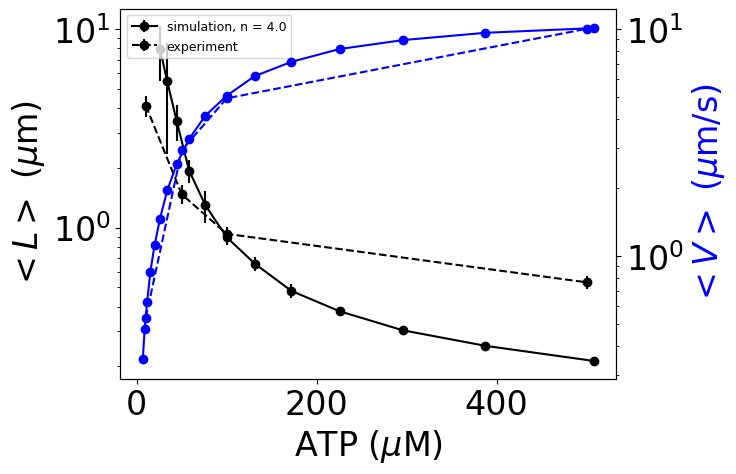

In [6]:
#direct comparison between the model and Tony Schindler's experiments
#tetramer controls, fig S1
strt = 7
end = 24
slc = 2
fig,ax = plt.subplots()
ax.errorbar(atps[strt:end], run_len[strt:end,slc], run_err[strt:end,slc], fmt = 'k-o',label = 'simulation, n = %s'%nhds[slc])
ax.set_ylabel('$<L>$ ($\mu$m)')
ax.set_yscale('log')
ax2=ax.twinx()
ax2.errorbar(atps[strt:end], velocity[strt:end,slc], vel_err[strt:end,slc], fmt = 'b-o')
#ax2.set_xlabel('ATP ($\mu$M)')
#ax2.set_ylabel('$<V>$ ($\mu$m/s)', color='blue')
#ax2.set_yscale('log')
#plt.show()

atp_expt = [10,50,100,500]
expt_run = [4.12,1.47,0.93,0.53]
erl_err = [0.49,0.16,0.08,0.04]

expt_vel = [0.536,2.926,4.95,10.01]
ev_err = [0.014,0.1,0.1,0.3]

#fig,ax = plt.subplots()
ax.errorbar(atp_expt, expt_run, erl_err, fmt = 'k--o',label = 'experiment')
ax.set_ylabel('$<L>$ ($\mu$m)')
ax.set_yscale('log')
ax2.errorbar(atp_expt, expt_vel, ev_err, fmt = 'b--o',label = 'experiment')
ax.set_xlabel('ATP ($\mu$M)')
ax2.set_ylabel('$<V>$ ($\mu$m/s)', color='blue')
ax2.set_yscale('log')
ax.legend(fontsize = 9,loc = 2)
plt.show()

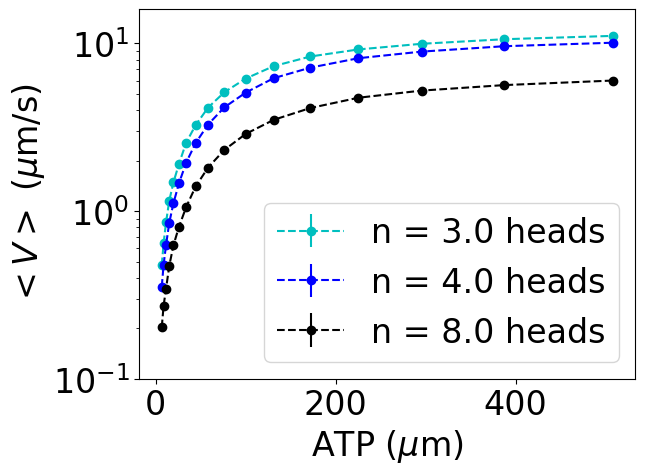

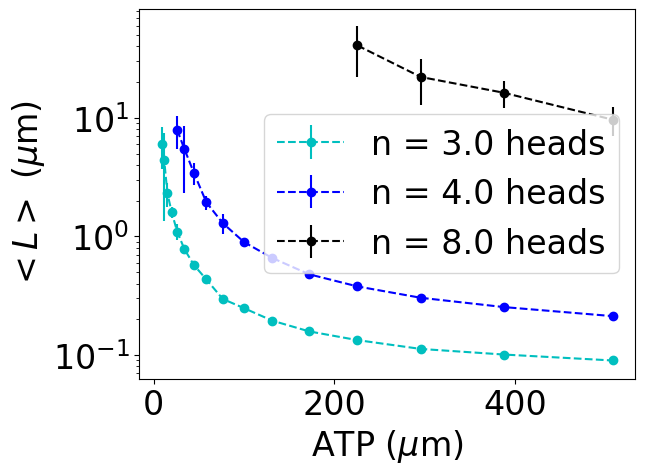

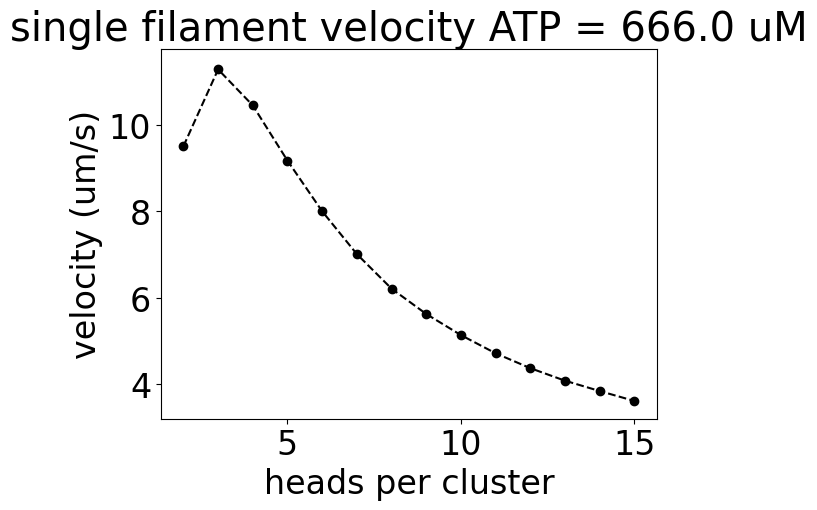

In [7]:
#effect of valency on single filament controls
#Fig S2

slc = 1
slc2 = 2
slc3 = 6

plt.errorbar(atps[strt:end], velocity[strt:end,slc], vel_err[strt:end,slc], fmt = 'c--o', label = 'n = %s heads' %nhds[slc])
plt.errorbar(atps[strt:end], velocity[strt:end,slc2], vel_err[strt:end,slc2], fmt = 'b--o',label = 'n = %s heads' %nhds[slc2])
plt.errorbar(atps[strt:end], velocity[strt:end,slc3], vel_err[strt:end,slc3], fmt = 'k--o',label = 'n = %s heads' %nhds[slc3])
plt.xlabel('ATP ($\mu$m)')
plt.ylabel('$<V>$ ($\mu$m/s)')
plt.gca().set_yscale('log')
plt.ylim([0.1,16])
#plt.gca().set_xscale('log')
#plt.title('single filament velocity n = %s heads' %nhds[slc])
plt.legend()
if save_pannels:
    plt.savefig('/home/redford/Downloads/s_fil_vel_' + curr_date + '.eps')
plt.show()


#plt.errorbar(atps, run_len[:,slc], run_err[:,slc], fmt = 'k--o')
plt.errorbar(atps[strt:end], run_len[strt:end,slc], run_err[strt:end,slc], fmt = 'c--o', label = 'n = %s heads' %nhds[slc])
plt.errorbar(atps[strt:end], run_len[strt:end,slc2], run_err[strt:end,slc2], fmt = 'b--o',label = 'n = %s heads' %nhds[slc2])
plt.errorbar(atps[strt:end], run_len[strt:end,slc3], run_err[strt:end,slc3], fmt = 'k--o',label = 'n = %s heads' %nhds[slc3])
plt.xlabel('ATP ($\mu$m)')
plt.ylabel('$<L>$ ($\mu$m)')
plt.gca().set_yscale('log')
#plt.gca().set_xscale('log')
plt.legend()
#plt.title('single filament run length n = %s heads' %nhds[slc])
if save_pannels:
    plt.savefig('/home/redford/Downloads/s_fil_rlen_' + curr_date + '.eps')
plt.show()



slc4 = 24

plt.errorbar(nhds[:], velocity[slc4,:], vel_err[slc4,:], fmt = 'k--o')
plt.xlabel('heads per cluster')
plt.ylabel('velocity (um/s)')
#plt.gca().set_xscale('log')
plt.title('single filament velocity ATP = %s uM' %np.around(atps[slc4],0))
if save_pannels:
    plt.savefig('/home/redford/Downloads/s_fil_vel_scaling_' + curr_date + '.eps')
plt.show()

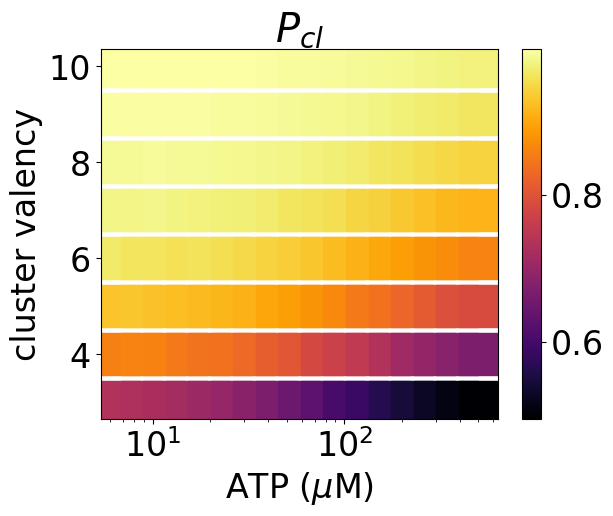

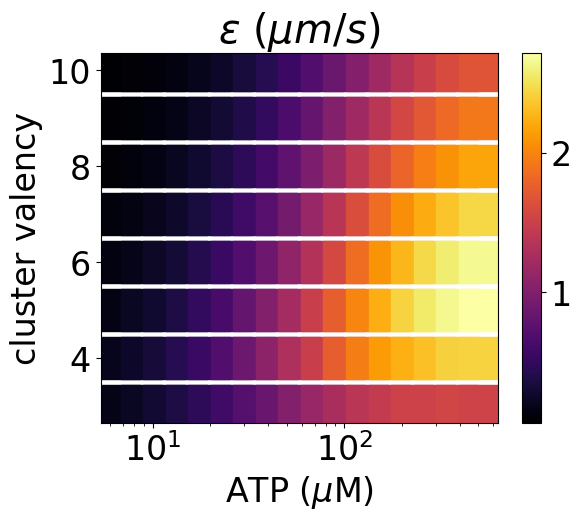

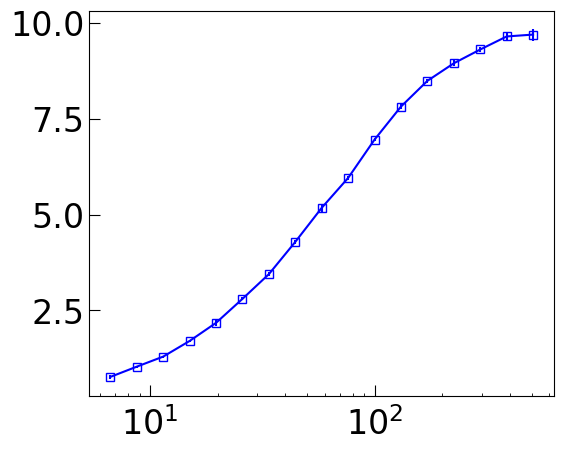

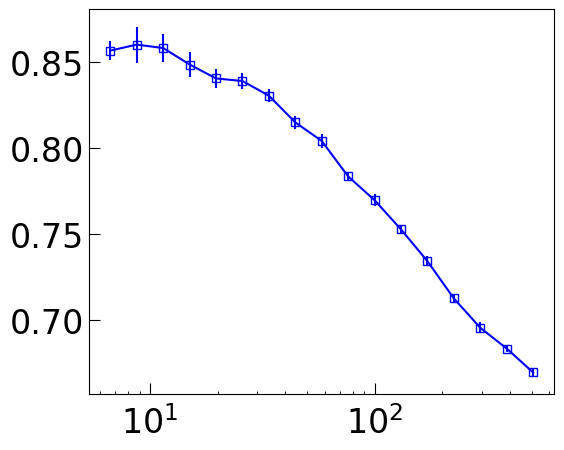

In [8]:
#state spaces for p_cl and epsilon as a funciton of ATP and valency
hdstrt = 1
hdend = 9

#xlking state space
space1, space2 = np.meshgrid(atps[strt:end],nhds[hdstrt:hdend])
size_length = np.size(space1.flatten())
sz = 900*np.ones(size_length)
#print(np.shape(space1),np.shape(xlk))
plt.scatter(space1.flatten(),space2.flatten(),s = sz,c = xlk[strt:end,hdstrt:hdend].transpose().flatten(),cmap = 'inferno',marker='s')
plt.gca().set_xscale('log')
plt.colorbar()
plt.xlabel('ATP ($\mu$M)')
plt.ylabel('cluster valency')
plt.title('$P_{cl}$')
#plt.xlim([8.5,2400])
if save_pannels:
    plt.savefig('/home/redford/Downloads/xlk_phase_space_' + curr_date + '.eps')
plt.show()

#displacement state space
#print(np.shape(space1),np.shape(xlk))
plt.scatter(space1.flatten(),space2.flatten(),s=sz,c = displacement[strt:end,hdstrt:hdend].transpose().flatten()/space2.flatten(),cmap = 'inferno',marker='s')#,\
            #norm=col.LogNorm(),)
plt.gca().set_xscale('log')
plt.colorbar()
plt.xlabel('ATP ($\mu$M)')
plt.ylabel('cluster valency')
plt.title('$\epsilon$ ($\mu m/s$)')
#plt.axis('equal')
#plt.axis('off')
#plt.xlim([8.5,2400])
if save_pannels:
    plt.savefig('/home/redford/Downloads/disp_phase_space_' + curr_date + '.eps')
plt.show()

#Fig 1D
#single slice in ATP disp
slc = 2
#slc = 6
figure(figsize=(6,5))
plt.errorbar(atps[strt:end],displacement[strt:end,slc],disp_err[strt:end,slc], fmt = 'b-s',markerfacecolor='none',linewidth=1.5)
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
#plt.xlabel('ATP ($\mu$M)')
#plt.ylabel('$\epsilon$ ($\mu m/s$)')
plt.gca().tick_params(axis="y", direction="in",length=8)
plt.gca().tick_params(axis="x", direction="in",length=8,pad=8)
plt.gca().tick_params(axis="x",which='minor', direction="in")
#plt.title('tetramer')
plt.show()

#Fig 1C
#single slice in ATP xlk
figure(figsize=(6,5))
plt.errorbar(atps[strt:end],xlk[strt:end,slc],xlk_err[strt:end,slc], fmt = 'b-s',markerfacecolor='none',linewidth = 1.5)
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
#plt.xlabel('ATP ($\mu$M)')
#plt.ylabel('$P_{cl}$')
#plt.title('n = %s heads' %nhds[slc])
#plt.xlim([8.5,2400])
plt.gca().tick_params(axis="y", direction="in",length=8)
plt.gca().tick_params(axis="x", direction="in",length=8,pad=8)
plt.gca().tick_params(axis="x",which='minor', direction="in")
#plt.title('tetramer')
plt.show()


In [9]:
def get_observables(displacement,xlk,variableK=True,ext=0,kappa=0.1,beta=0.12):
    alph = np.power(displacement,beta)
    c = 1

    if variableK:
        k = 0.01 + kappa*np.power(c*xlk + ext,1)
    else:
        k = 0.01
    
    #l = np.sqrt((k*eta)/(alph*gamma))
    l = np.sqrt(k/alph)
    v = np.sqrt(k*alph)
    
    return l,v

In [10]:
def normalize(row):
    
    sub = row
    #sub = row - np.amin(row)
    normed = sub/np.amax(sub)
    
    return normed

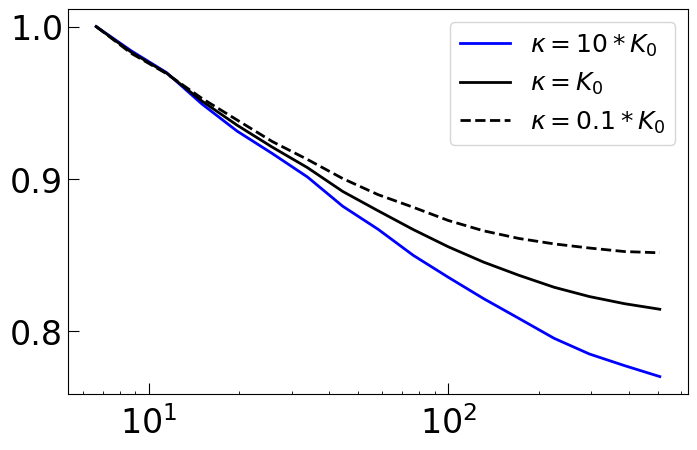

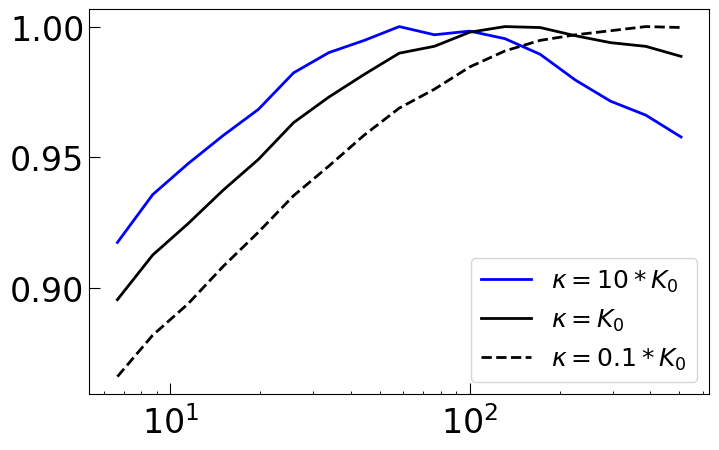

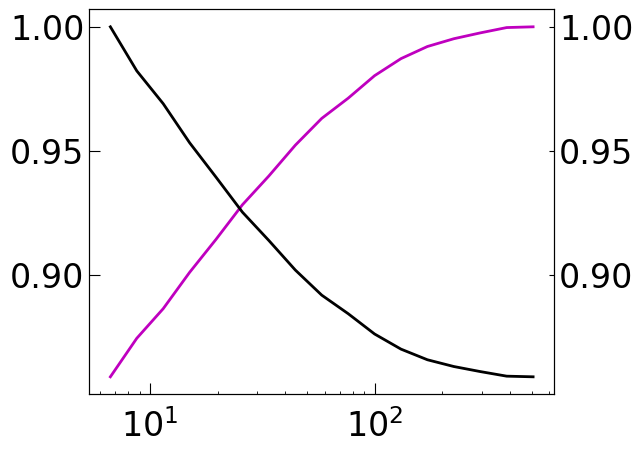

In [11]:
#comparing the constant K and variable K models
#Fig 1E and 2D,E

slc8 = 6
slc4 = 2
slc3 = 1

l8,v8 = get_observables(displacement[strt:end,slc8],xlk[strt:end,slc8])
l4,v4 = get_observables(displacement[strt:end,slc4],xlk[strt:end,slc4])
l3,v3 = get_observables(displacement[strt:end,slc3],xlk[strt:end,slc3])

lemm4,vlemm4 = get_observables(displacement[strt:end,slc4],xlk[strt:end,slc4],False,ext=0,kappa=0)

lemm01,vlemm01 = get_observables(displacement[strt:end,slc4],xlk[strt:end,slc4],True,ext=0,kappa=0.001)
lemm1,vlemm1 = get_observables(displacement[strt:end,slc4],xlk[strt:end,slc4],True,ext=0,kappa=0.01)

plt.figure(figsize=(8,5))
plt.plot(atps[strt:end],normalize(l4), 'b', label = '$\kappa = 10*K_0$',linewidth=2)
plt.plot(atps[strt:end],normalize(lemm1), 'k-', label = '$\kappa = K_0$',linewidth=2)
plt.plot(atps[strt:end],normalize(lemm01), 'k--', label = '$\kappa = 0.1*K_0$',linewidth=2)
plt.gca().set_xscale('log')
#plt.ylabel('$l_n$')
#plt.xlabel('ATP ($\mu$M)')
#plt.title('nematic length scale')
plt.gca().tick_params(axis="y", direction="in",length=8)
plt.gca().tick_params(axis="x", direction="in",length=8,pad=8)
plt.gca().tick_params(axis="x",which='minor', direction="in")
plt.legend(fontsize=18)
#ax2.legend()
plt.show()



plt.figure(figsize=(8,5))
plt.plot(atps[strt:end],normalize(v4), 'b', label = '$\kappa = 10*K_0$',linewidth=2)
plt.plot(atps[strt:end],normalize(vlemm1), 'k-', label = '$\kappa = K_0$',linewidth=2)
plt.plot(atps[strt:end],normalize(vlemm01), 'k--', label = '$\kappa = 0.1*K_0$',linewidth=2)
plt.gca().set_xscale('log')
#plt.ylabel('$v_n$')
#plt.xlabel('ATP ($\mu$M)')
plt.legend(fontsize=18)
plt.gca().tick_params(axis="y", direction="in",length=8)
plt.gca().tick_params(axis="x", direction="in",length=8,pad=8)
plt.gca().tick_params(axis="x",which='minor', direction="in")
plt.show()



fig,ax = plt.subplots()
ax.plot(atps[strt:end],normalize(vlemm4), 'm',linewidth=2)
ax2=ax.twinx()
ax2.plot(atps[strt:end],normalize(lemm4), 'k',linewidth=2)
#ax.set_xlabel('ATP ($\mu$M)')
#ax.set_ylabel('$v_n$',color = 'm')
#ax2.set_ylabel('$l_n$',color = 'k')
plt.gca().set_xscale('log')
ax.tick_params(axis="y", direction="in",length=8)
ax2.tick_params(axis="y", direction="in")
ax.tick_params(axis="x", direction="in",length=8,pad=10)
ax.tick_params(axis="x",which='minor', direction="in")
plt.gcf().set_size_inches(6,5)
plt.show()

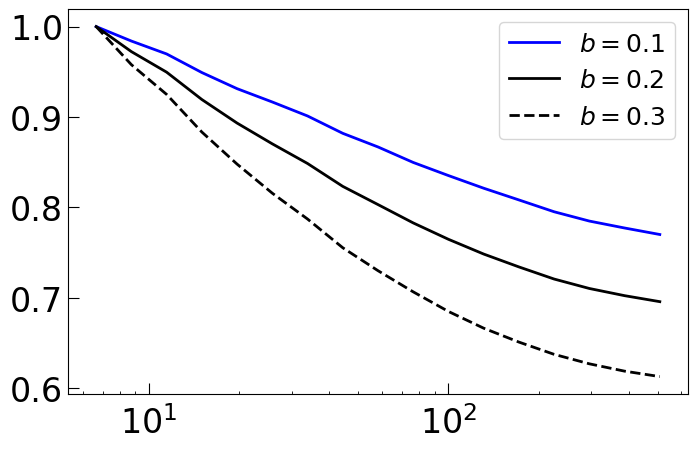

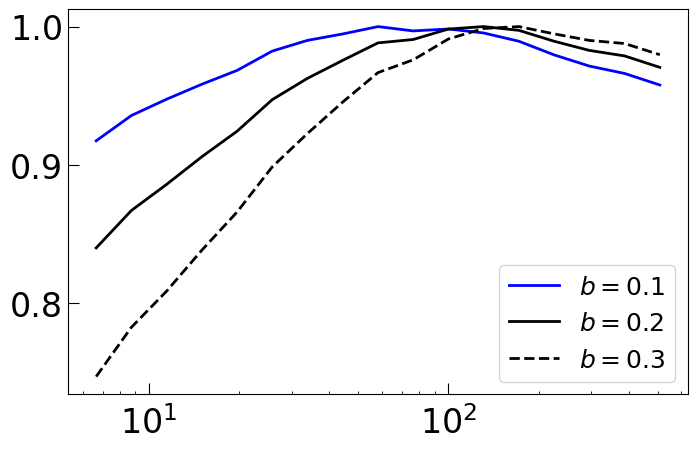

In [19]:
#changing beta
lemm4,vlemm4 = get_observables(displacement[strt:end,slc4],xlk[strt:end,slc4],False,ext=0,kappa=0.1,beta = 0.1)

lemm1,vlemm1 = get_observables(displacement[strt:end,slc4],xlk[strt:end,slc4],True,ext=0,kappa=0.1,beta = 0.2)
lemm01,vlemm01 = get_observables(displacement[strt:end,slc4],xlk[strt:end,slc4],True,ext=0,kappa=0.1,beta = 0.3)

plt.figure(figsize=(8,5))
plt.plot(atps[strt:end],normalize(l4), 'b', label = '$b = 0.1$',linewidth=2)
plt.plot(atps[strt:end],normalize(lemm1), 'k-', label = '$b = 0.2$',linewidth=2)
plt.plot(atps[strt:end],normalize(lemm01), 'k--', label = '$b = 0.3$',linewidth=2)
plt.gca().set_xscale('log')
#plt.ylabel('$l_n$')
#plt.xlabel('ATP ($\mu$M)')
#plt.title('nematic length scale')
plt.gca().tick_params(axis="y", direction="in",length=8)
plt.gca().tick_params(axis="x", direction="in",length=8,pad=8)
plt.gca().tick_params(axis="x",which='minor', direction="in")
plt.legend(fontsize=18)
#ax2.legend()
plt.show()



plt.figure(figsize=(8,5))
plt.plot(atps[strt:end],normalize(v4), 'b', label = '$b = 0.1$',linewidth=2)
plt.plot(atps[strt:end],normalize(vlemm1), 'k-', label = '$b = 0.2$',linewidth=2)
plt.plot(atps[strt:end],normalize(vlemm01), 'k--', label = '$b = 0.3$',linewidth=2)
plt.gca().set_xscale('log')
#plt.ylabel('$v_n$')
#plt.xlabel('ATP ($\mu$M)')
plt.legend(fontsize=18)
plt.gca().tick_params(axis="y", direction="in",length=8)
plt.gca().tick_params(axis="x", direction="in",length=8,pad=8)
plt.gca().tick_params(axis="x",which='minor', direction="in")
plt.show()


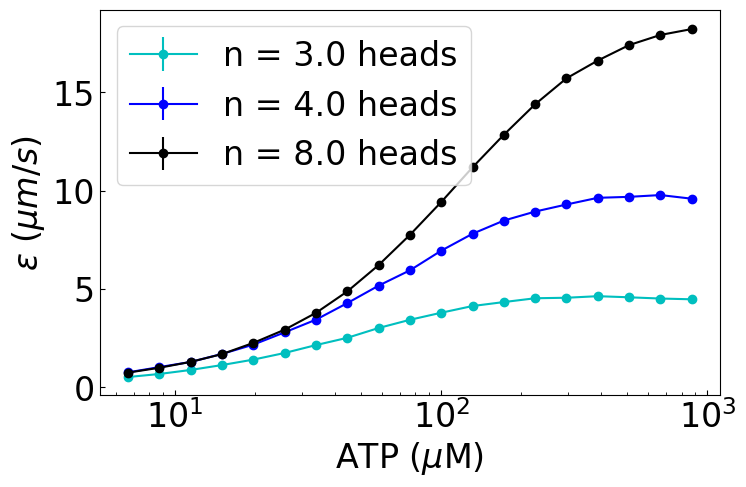

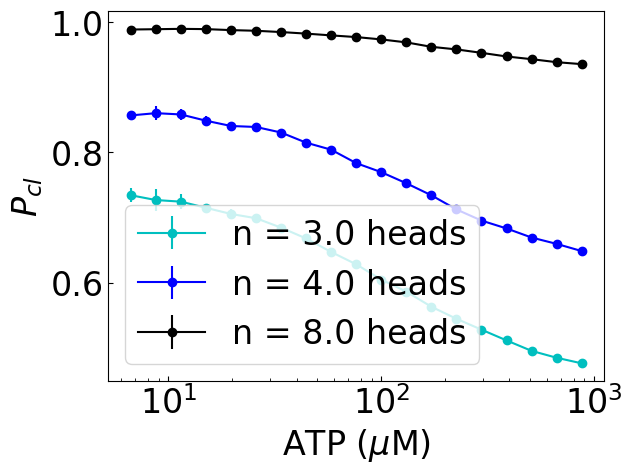

In [13]:
bigend = 26
slc = 1
slc2 = 2
slc3 = 6


#epsilon as a function of cluster valency
plt.figure(figsize=(8,5))
plt.errorbar(atps[strt:bigend],displacement[strt:bigend,slc],disp_err[strt:bigend,slc], fmt = 'c-o',linewidth=1.5,label = 'n = %s heads' %nhds[slc])
plt.errorbar(atps[strt:bigend],displacement[strt:bigend,slc2],disp_err[strt:bigend,slc2], fmt = 'b-o',linewidth=1.5,label = 'n = %s heads' %nhds[slc2])
plt.errorbar(atps[strt:bigend],displacement[strt:bigend,slc3],disp_err[strt:bigend,slc3], fmt = 'k-o',linewidth=1.5,label = 'n = %s heads' %nhds[slc3])
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.xlabel('ATP ($\mu$M)')
plt.ylabel('$\epsilon$ ($\mu m/s$)')
plt.gca().tick_params(axis="y", direction="in")
plt.gca().tick_params(axis="x", direction="in")
plt.gca().tick_params(axis="x",which='minor', direction="in")
plt.legend()
plt.show()


#p_cl as a function of cluster valency
plt.errorbar(atps[strt:bigend],xlk[strt:bigend,slc],xlk_err[strt:bigend,slc], fmt = 'c-o',linewidth=1.5,label = 'n = %s heads' %nhds[slc])
plt.errorbar(atps[strt:bigend],xlk[strt:bigend,slc2],xlk_err[strt:bigend,slc2], fmt = 'b-o',linewidth=1.5,label = 'n = %s heads' %nhds[slc2])
plt.errorbar(atps[strt:bigend],xlk[strt:bigend,slc3],xlk_err[strt:bigend,slc3], fmt = 'k-o',linewidth=1.5,label = 'n = %s heads' %nhds[slc3])
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.xlabel('ATP ($\mu$M)')
plt.ylabel('$P_{cl}$')
plt.gca().tick_params(axis="y", direction="in")
plt.gca().tick_params(axis="x", direction="in")
plt.gca().tick_params(axis="x",which='minor', direction="in")
plt.legend()
plt.show()


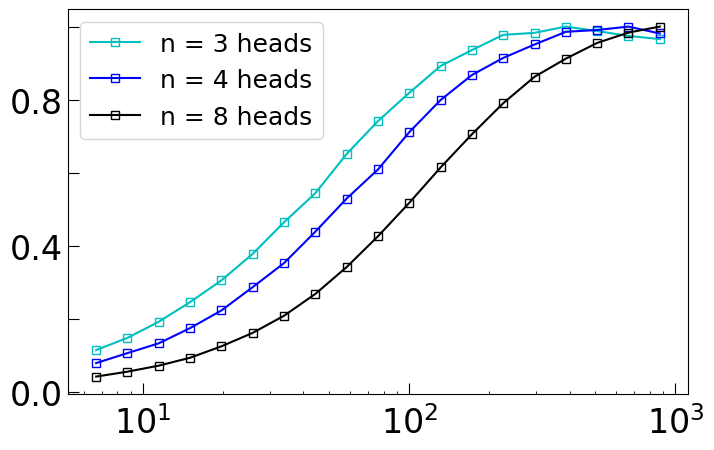

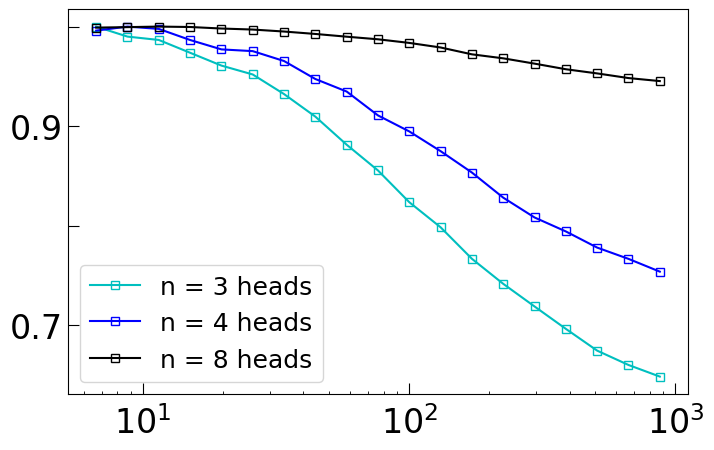

In [14]:
#normalized epsilon as a function of cluster valency

plt.figure(figsize=(8,5))
plt.locator_params(axis='y',nbins=6)
plt.setp(plt.gca().get_yticklabels()[::2], visible=False)
plt.plot(atps[strt:bigend],normalize(displacement[strt:bigend,slc]),'c-s',markerfacecolor='none',linewidth=1.5,label = 'n = %s heads' %int(nhds[slc]))
plt.plot(atps[strt:bigend],normalize(displacement[strt:bigend,slc2]),'b-s',markerfacecolor='none',linewidth=1.5,label = 'n = %s heads' %int(nhds[slc2]))
plt.plot(atps[strt:bigend],normalize(displacement[strt:bigend,slc3]),'k-s',markerfacecolor='none',linewidth=1.5,label = 'n = %s heads' %int(nhds[slc3]))
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
#plt.xlabel('ATP ($\mu$M)')
#plt.ylabel('$\epsilon$ (normalized)')
plt.gca().tick_params(axis="y", direction="in",length=8)
plt.gca().tick_params(axis="x", direction="in",length=8,pad=8)
plt.gca().tick_params(axis="x",which='minor', direction="in")
plt.legend(fontsize=18)
plt.show()


#p_cl as a function of cluster valency
plt.figure(figsize=(8,5))
plt.locator_params(axis='y',nbins=6)
plt.setp(plt.gca().get_yticklabels()[::2], visible=False)
plt.plot(atps[strt:bigend],normalize(xlk[strt:bigend,slc]),'c-s',markerfacecolor='none',linewidth=1.5,label = 'n = %s heads' %int(nhds[slc]))
plt.plot(atps[strt:bigend],normalize(xlk[strt:bigend,slc2]),'b-s',markerfacecolor='none',linewidth=1.5,label = 'n = %s heads' %int(nhds[slc2]))
plt.plot(atps[strt:bigend],normalize(xlk[strt:bigend,slc3]),'k-s',markerfacecolor='none',linewidth=1.5,label = 'n = %s heads' %int(nhds[slc3]))
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
#plt.xlabel('ATP ($\mu$M)')
#plt.ylabel('$P_{cl}$ (normalized)')
plt.gca().tick_params(axis="y", direction="in",length=8)
plt.gca().tick_params(axis="x", direction="in",length=8,pad=8)
plt.gca().tick_params(axis="x",which='minor', direction="in")
plt.legend(fontsize=18)
plt.show()


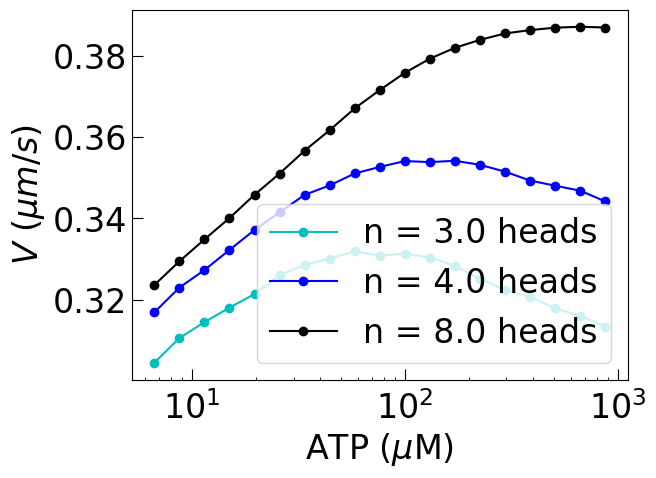

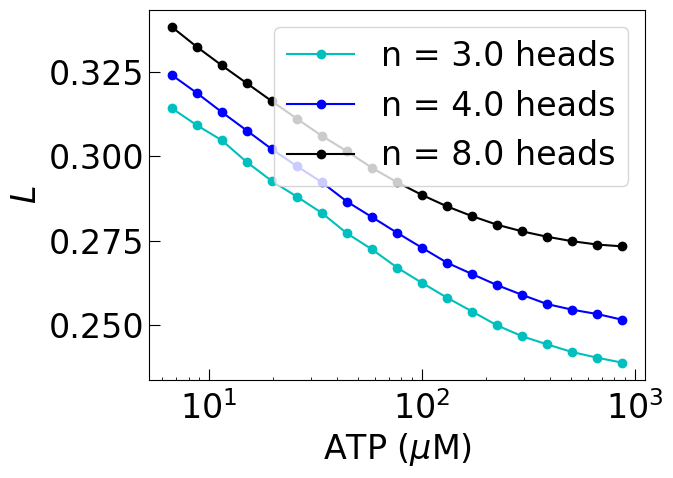

In [15]:
#valency slices in V and L
L,V = get_observables(displacement[strt:bigend,hdstrt:hdend],xlk[strt:bigend,hdstrt:hdend])
temp_atp = atps[strt:bigend]



#Velocity

plt.plot(atps[strt:bigend],V[:,slc],'c-o',linewidth=1.5,label = 'n = %s heads' %nhds[slc])
plt.plot(atps[strt:bigend],V[:,slc2],'b-o',linewidth=1.5,label = 'n = %s heads' %nhds[slc2])
plt.plot(atps[strt:bigend],V[:,slc3],'k-o',linewidth=1.5,label = 'n = %s heads' %nhds[slc3])
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.xlabel('ATP ($\mu$M)')
plt.ylabel('$V$ ($\mu m/s$)')
plt.gca().tick_params(axis="y", direction="in",length=8)
plt.gca().tick_params(axis="x", direction="in",length=8,pad=8)
plt.gca().tick_params(axis="x",which='minor', direction="in")
plt.legend()
if save_pannels:
    plt.savefig('/home/redford/Downloads/tet_disp_' + curr_date + '.eps')
plt.show()

#L
plt.plot(atps[strt:bigend],L[:,slc],'c-o',linewidth=1.5,label = 'n = %s heads' %nhds[slc])
plt.plot(atps[strt:bigend],L[:,slc2],'b-o',linewidth=1.5,label = 'n = %s heads' %nhds[slc2])
plt.plot(atps[strt:bigend],L[:,slc3],'k-o',linewidth=1.5,label = 'n = %s heads' %nhds[slc3])
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.xlabel('ATP ($\mu$M)')
plt.ylabel('$L$')
#plt.title('n = %s heads' %nhds[slc])
#plt.xlim([8.5,2400])
plt.gca().tick_params(axis="y", direction="in",length=8)
plt.gca().tick_params(axis="x", direction="in",length=8,pad=8)
plt.gca().tick_params(axis="x",which='minor', direction="in")
plt.legend()
if save_pannels:
    plt.savefig('/home/redford/Downloads/tet_xlk_' + curr_date + '.eps')
plt.show()



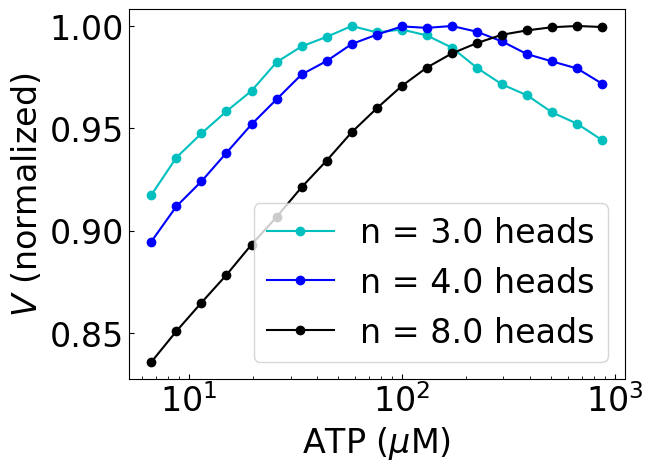

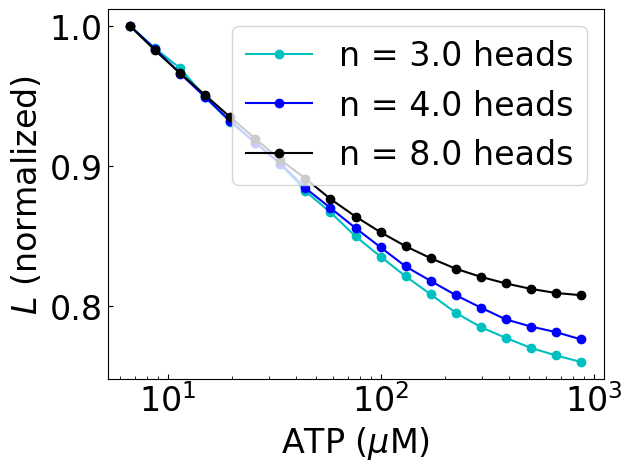

In [16]:
#normalized velocity
plt.plot(atps[strt:bigend],normalize(V[:,slc]),'c-o',linewidth=1.5,label = 'n = %s heads' %nhds[slc])
plt.plot(atps[strt:bigend],normalize(V[:,slc2]),'b-o',linewidth=1.5,label = 'n = %s heads' %nhds[slc2])
plt.plot(atps[strt:bigend],normalize(V[:,slc3]),'k-o',linewidth=1.5,label = 'n = %s heads' %nhds[slc3])
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.xlabel('ATP ($\mu$M)')
plt.ylabel('$V$ (normalized)')
plt.gca().tick_params(axis="y", direction="in")
plt.gca().tick_params(axis="x", direction="in")
plt.gca().tick_params(axis="x",which='minor', direction="in")
plt.legend()
if save_pannels:
    plt.savefig('/home/redford/Downloads/tet_disp_' + curr_date + '.eps')
plt.show()



#normalized L
plt.plot(atps[strt:bigend],normalize(L[:,slc]),'c-o',linewidth=1.5,label = 'n = %s heads' %nhds[slc])
plt.plot(atps[strt:bigend],normalize(L[:,slc2]),'b-o',linewidth=1.5,label = 'n = %s heads' %nhds[slc2])
plt.plot(atps[strt:bigend],normalize(L[:,slc3]),'k-o',linewidth=1.5,label = 'n = %s heads' %nhds[slc3])
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.xlabel('ATP ($\mu$M)')
plt.ylabel('$L$ (normalized)')
#plt.title('n = %s heads' %nhds[slc])
#plt.xlim([8.5,2400])
plt.gca().tick_params(axis="y", direction="in")
plt.gca().tick_params(axis="x", direction="in")
plt.gca().tick_params(axis="x",which='minor', direction="in")
plt.legend()
if save_pannels:
    plt.savefig('/home/redford/Downloads/tet_xlk_' + curr_date + '.eps')
plt.show()

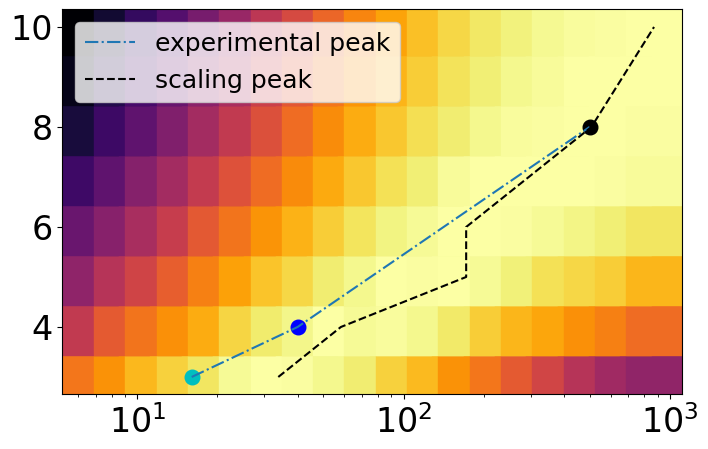

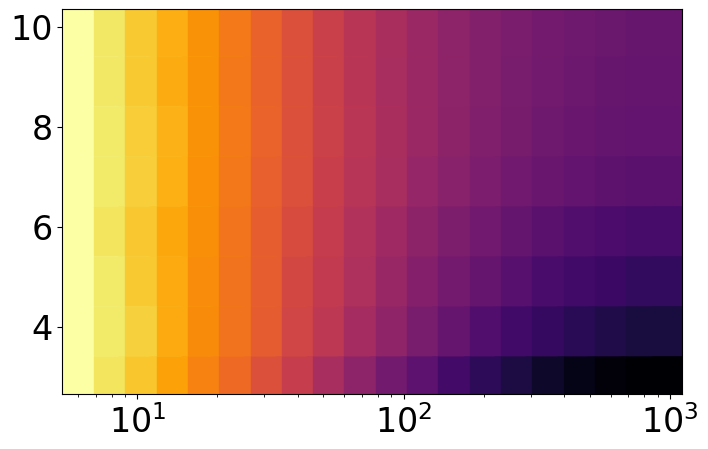

In [17]:
#state space and slices of nematic quantities with oligomerization
expt_atp = [16,40,500]
expt_hds = [3,4,8]
colorz = ['c','b','k']

scatter_size = np.size(nhds[hdstrt:hdend])

yes = np.zeros(scatter_size)
xes = np.zeros(scatter_size)

vtemp = V

for mm in range(scatter_size):
    indd = hdstrt+mm
    yes[mm] = nhds[indd]
    
    row = V[:,mm]
    conc = temp_atp[row==np.amax(row)]
    xes[mm] = conc
    vtemp[:,mm] = normalize(V[:,mm])
    L[:,mm] = normalize(L[:,mm])

plt.figure(figsize=(8,5))
space1, space2 = np.meshgrid(temp_atp,nhds[hdstrt:hdend])
size_length = np.size(space1.flatten())
sz = 1600*np.ones(size_length)
#print(np.shape(space1),np.shape(xlk))
plt.scatter(space1.flatten(),space2.flatten(),s = sz,c = V.transpose().flatten(),cmap = 'inferno',marker='s')
for ii in range(3):
    mycol = colorz[ii]
    plt.scatter(expt_atp[ii],expt_hds[ii],color = '%s'%mycol,s=110)
plt.plot(expt_atp,expt_hds,'-.',label='experimental peak')
#plt.colorbar()
plt.plot(xes,yes,'k--',label = 'scaling peak')
plt.gca().set_xscale('log')
#plt.xlabel('ATP ($\mu M$)')
#plt.ylabel('cluster valency')
#plt.title('$v_n$')
plt.legend(loc = 2,fontsize=18)
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(space1.flatten(),space2.flatten(),s = sz,c = L.transpose().flatten(),cmap = 'inferno',marker='s')
plt.gca().set_xscale('log')
#plt.colorbar()
#plt.xlabel('ATP ($\mu M$)')
#plt.ylabel('cluster valency')
#plt.title('$l_n$')
plt.show()



In [71]:
print('%s'%mycol+'-o')

c-o


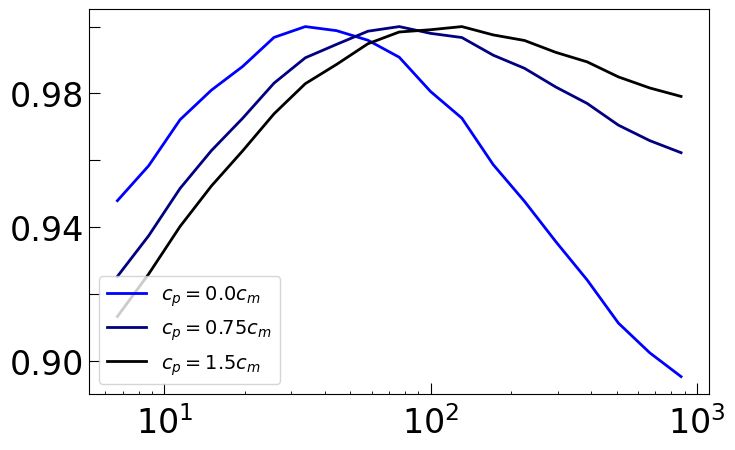

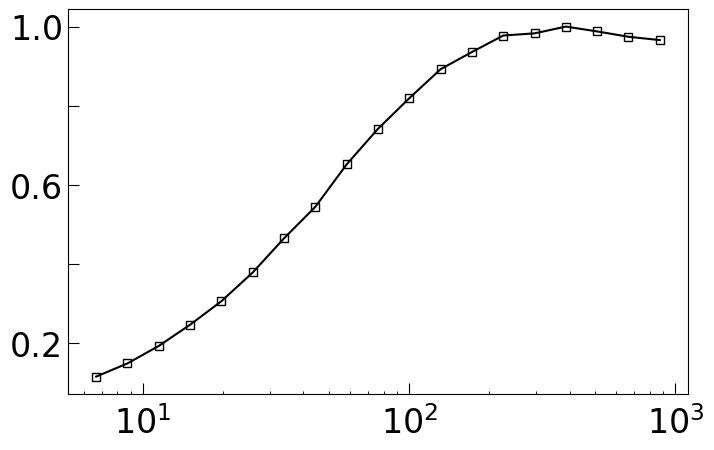

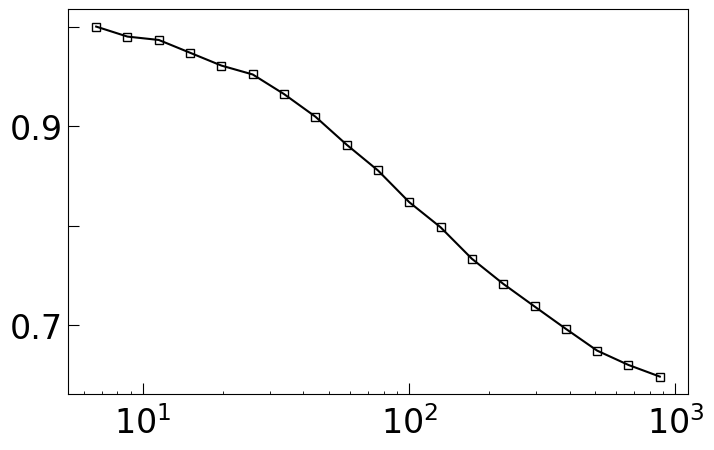

In [20]:
#varying external xlk
slc = 1

n_ext = 3
ext_list = np.linspace(0,1.5,n_ext)

peak_x = np.zeros(n_ext)
peak_y = np.zeros(n_ext)

plt.figure(figsize=(8,5))
plt.locator_params(axis='y',nbins=6)
plt.setp(plt.gca().get_yticklabels()[::2], visible=False)
for ee in range(n_ext):
    external = ext_list[ee]
    l0,v0 = get_observables(displacement[strt:bigend,slc],xlk[strt:bigend,slc],ext=external)
    max_x = temp_atp[v0 == np.amax(v0)]
    max_y = v0[v0 == np.amax(v0)]
    
    peak_x[ee] = external
    peak_y[ee] = max_x
    
    color = [0,0,(1-external/np.amax(ext_list))]
    col = [(1-external/np.amax(ext_list)),0,0]
    plt.plot(temp_atp, normalize(v0),c = color,label = '$c_p = %s c_m$'%np.round(external,3),linewidth=2)
    #plt.plot(temp_atp, v0,c = color,label = 'n=3 + %s xlk'%np.round(external,3))
    #plt.scatter(max_x,max_y,c=color)

#plt.xlabel('ATP ($\mu$M)')
#plt.ylabel('$v_n$')
plt.gca().set_xscale('log')
plt.legend(loc=3,fontsize=14)
plt.gca().tick_params(axis="y", direction="in",length=8)
plt.gca().tick_params(axis="x", direction="in",length=8,pad=8)
plt.gca().tick_params(axis="x",which='minor', direction="in")
if save_pannels:
    plt.savefig('/home/redford/Downloads/ext_xlk_sim_' + curr_date + '.eps')
plt.show()


for ll in range(n_ext):
    ext = ext_list[ll]
    col = [0,0,(1-ext/np.amax(ext_list))]
    #plt.axvline(x = peak_y[ll],color = col,label = 'n=3 + %s xlk'%np.round(ext,3))
plt.figure(figsize=(8,5))
plt.locator_params(axis='y',nbins=6)
plt.setp(plt.gca().get_yticklabels()[::2], visible=False)
#plt.errorbar(temp_atp,displacement[strt:bigend,slc],disp_err[strt:bigend,slc], fmt = 'k-s',markerfacecolor='none',linewidth=1.5)
plt.plot(temp_atp,normalize(displacement[strt:bigend,slc]),'k-s',markerfacecolor='none',linewidth=1.5)
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
#plt.xlabel('ATP ($\mu$M)')
#plt.ylabel('$\epsilon$ ($\mu m/s$)')
#`plt.title('n = %s heads' %nhds[slc])
#plt.xlim([8.5,2400])
#plt.legend(loc=2,fontsize=12)
plt.gca().tick_params(axis="y", direction="in",length=8)
plt.gca().tick_params(axis="x", direction="in",length=8,pad=8)
plt.gca().tick_params(axis="x",which='minor', direction="in")
if save_pannels:
    plt.savefig('/home/redford/Downloads/ext_xlk_strain_sim_' + curr_date + '.eps')
plt.show()

#p_cl
plt.figure(figsize=(8,5))
plt.locator_params(axis='y',nbins=6)
plt.setp(plt.gca().get_yticklabels()[::2], visible=False)
#plt.errorbar(temp_atp,xlk[strt:bigend,slc],xlk_err[strt:bigend,slc], fmt = 'k-s',markerfacecolor='none',linewidth=1.5)
plt.plot(temp_atp,normalize(xlk[strt:bigend,slc]),'k-s',markerfacecolor='none',linewidth=1.5)
plt.gca().set_xscale('log')
plt.gca().yaxis.set_major_formatter('{x:9<1.1f}')
#plt.gca().set_yscale('log')
#plt.xlabel('ATP ($\mu$M)')
#plt.ylabel('$P_{cl}$')
#`plt.title('n = %s heads' %nhds[slc])
#plt.xlim([8.5,2400])
#plt.legend(loc=2,fontsize=12)
plt.gca().tick_params(axis="y", direction="in",length=8)
plt.gca().tick_params(axis="x", direction="in",length=8,pad=8)
plt.gca().tick_params(axis="x",which='minor', direction="in")
if save_pannels:
    plt.savefig('/home/redford/Downloads/ext_xlk_strain_sim_' + curr_date + '.eps')
plt.show()



In [18]:
alpha = np.power(displacement*xlk,0.12)
c = 0.01
k = 0.001 + np.power(c*xlk,1)

V = np.sqrt(k*alpha)
L = np.sqrt(k/alpha)

slces = [1,2,4,6,10,13]
nslc = np.size(slces)
diffs = np.zeros(nslc)

for ii in range(nslc):
    slc = slces[ii]
    mx = nhds[slces[-1]]
    v = get_norm2(V[:,slc])
    
    kdiff = k[-1,slc] - k[0,slc]
    xdiff = xlk[-1,slc] - xlk[0,slc]
    diffs[ii] = xdiff
    
    color = [0,0,(1-slc/mx)]
    plt.plot(atps,v, c = color, label = 'n = %s heads' %nhds[slc])

plt.gca().set_xscale('log')
plt.ylabel('$v_n$')
plt.xlabel('ATP ($\mu$M)')
plt.legend(fontsize=12)
plt.gca().tick_params(axis="y", direction="in")
plt.gca().tick_params(axis="x", direction="in")
plt.gca().tick_params(axis="x",which='minor', direction="in")
plt.show()


plt.plot(slces,diffs,'k')
plt.xlabel('cluster valency')
plt.ylabel('$\Delta P_{cl}$')
plt.gca().tick_params(axis="y", direction="in")
plt.gca().tick_params(axis="x", direction="in")
plt.gca().tick_params(axis="x",which='minor', direction="in")
plt.show()


/software/python-anaconda-2020.02-el7-x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


NameError: name 'get_norm2' is not defined